In [1]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import *
import scipy.integrate as integrate

In [2]:
from sklearn.datasets import load_iris
data = load_iris()["data"]
data = pd.DataFrame(data)
target = load_iris()["target"]
target = pd.DataFrame(target, columns=['target'])
data = pd.concat([data, target], axis=1)

In [3]:
data[:8]

,0,1,2,3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0


In [4]:
# Оценки параметров a
a = []
for i in range(3):
    a += [data[data.target == i].ix[:, :-1].mean()]
    print "Оценка для K = ", i, "\n", a[i]

Оценка для K =  0 
0    5.006
1    3.418
2    1.464
3    0.244
dtype: float64
Оценка для K =  1 
0    5.936
1    2.770
2    4.260
3    1.326
dtype: float64
Оценка для K =  2 
0    6.588
1    2.974
2    5.552
3    2.026
dtype: float64


In [5]:
# Матрицы ковариаций для всех трех компонентов
cov_matrix = np.zeros((3,4,4))
for k in range(3):
    for i in range(4):
        for j in range(4):
            tmp = data[data.target == k].ix[:, i] * data[data.target == k].ix[:, j]
            cov_matrix[k][i][j] = tmp.mean() - data[data.target == k].ix[:, i].mean() * data[data.target == k].ix[:, j].mean()
cov_matrix 

array([[[ 0.121764,  0.098292,  0.015816,  0.010336],
        [ 0.098292,  0.142276,  0.011448,  0.011208],
        [ 0.015816,  0.011448,  0.029504,  0.005584],
        [ 0.010336,  0.011208,  0.005584,  0.011264]],

       [[ 0.261104,  0.08348 ,  0.17924 ,  0.054664],
        [ 0.08348 ,  0.0965  ,  0.081   ,  0.04038 ],
        [ 0.17924 ,  0.081   ,  0.2164  ,  0.07164 ],
        [ 0.054664,  0.04038 ,  0.07164 ,  0.038324]],

       [[ 0.396256,  0.091888,  0.297224,  0.048112],
        [ 0.091888,  0.101924,  0.069952,  0.046676],
        [ 0.297224,  0.069952,  0.298496,  0.047848],
        [ 0.048112,  0.046676,  0.047848,  0.073924]]])

## Проекции на пары координат

In [6]:
# Вектора средних для каждой пары для каждой компоненты смеси
cov_matrix_pairs = np.zeros((3,3,2,2))
pairs = [[0, 1],[1, 3],[2, 3]]
a_pairs = np.zeros((3, 3, 2))
for t in range(3):
    for k in range(3):
        a_pairs[t][k] = data[data.target == k].ix[:, pairs[t]].mean()
print "Вектора средних для каждой пары для каждой компоненты смеси \n", a_pairs, "\n"

# Матрицы ковариаций для каждой из пар для каждой из компонент смеси
for t in range(3):
    for k in range(3):
        for i in range(2):
            for j in range(2):
                tmp = data[data.target == k].ix[:, pairs[t][i]] * data[data.target == k].ix[:, pairs[t][j]]
                cov_matrix_pairs[t][k][i][j] = tmp.mean() - data[data.target == k].ix[:, pairs[t][i]].mean() * data[data.target == k].ix[:, pairs[t][j]].mean()
print "Матрицы ковариаций для каждой из пар для каждой из компонент смеси \n", cov_matrix_pairs, "\n"

Вектора средних для каждой пары для каждой компоненты смеси 
[[[ 5.006  3.418]
  [ 5.936  2.77 ]
  [ 6.588  2.974]]

 [[ 3.418  0.244]
  [ 2.77   1.326]
  [ 2.974  2.026]]

 [[ 1.464  0.244]
  [ 4.26   1.326]
  [ 5.552  2.026]]] 

Матрицы ковариаций для каждой из пар для каждой из компонент смеси 
[[[[ 0.121764  0.098292]
   [ 0.098292  0.142276]]

  [[ 0.261104  0.08348 ]
   [ 0.08348   0.0965  ]]

  [[ 0.396256  0.091888]
   [ 0.091888  0.101924]]]


 [[[ 0.142276  0.011208]
   [ 0.011208  0.011264]]

  [[ 0.0965    0.04038 ]
   [ 0.04038   0.038324]]

  [[ 0.101924  0.046676]
   [ 0.046676  0.073924]]]


 [[[ 0.029504  0.005584]
   [ 0.005584  0.011264]]

  [[ 0.2164    0.07164 ]
   [ 0.07164   0.038324]]

  [[ 0.298496  0.047848]
   [ 0.047848  0.073924]]]] 



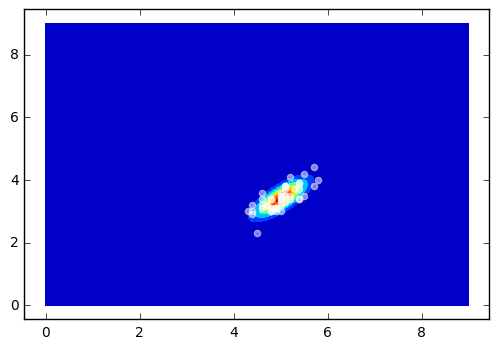

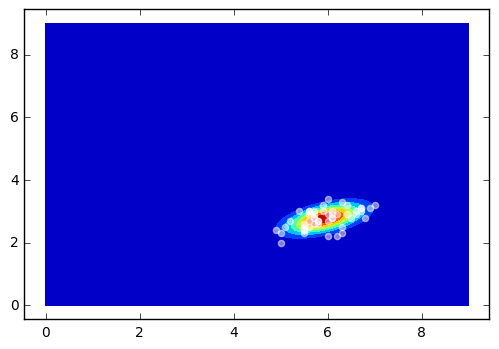

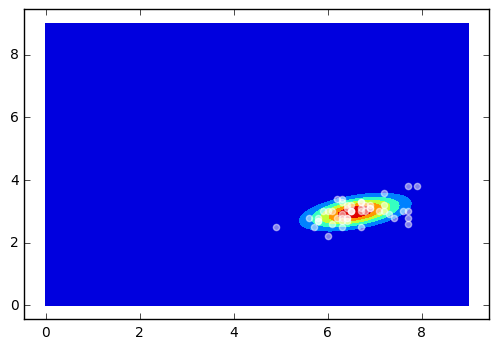

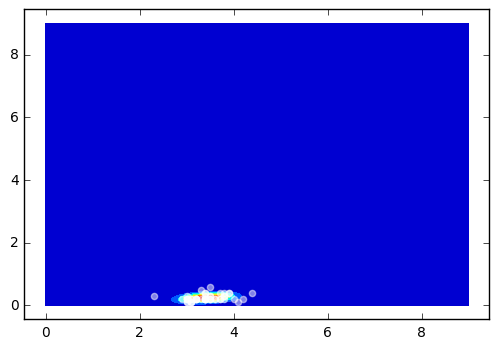

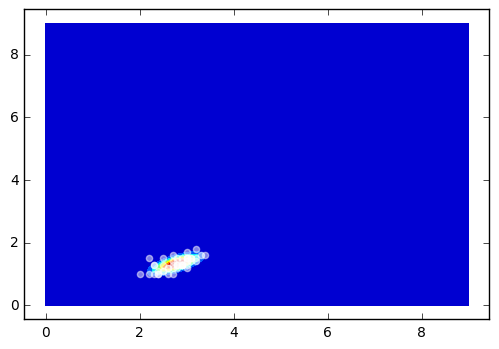

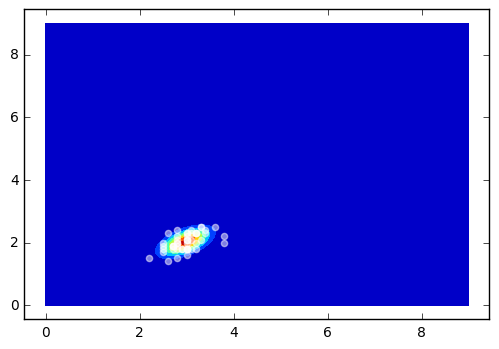

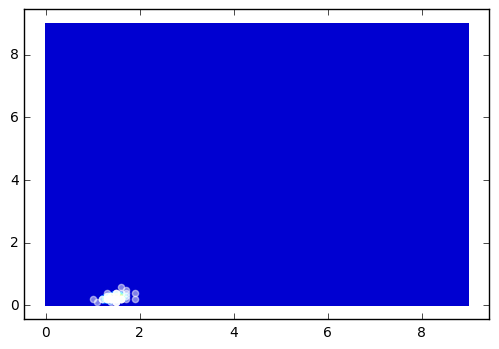

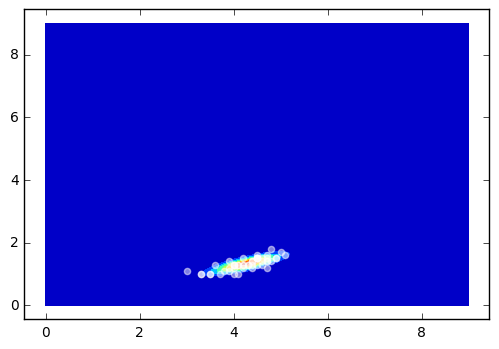

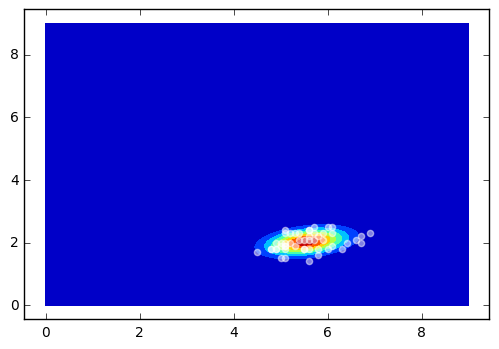

In [23]:
# Графики соответствующих плотностей и точки выборки
for t in range(3):
    for k in range(3):
        x, y = np.mgrid[0:9:.01, 0:9:.01]
        pos = np.empty(x.shape + (2,))
        pos[:, :, 0] = x; pos[:, :, 1] = y
        rv = multivariate_normal(a_pairs[t][k], cov_matrix_pairs[t][k])
        plt.contourf(x, y, rv.pdf(pos))
        plt.scatter(data[data.target == k].ix[:, pairs[t][0]], data[data.target == k].ix[:, pairs[t][1]], color = "white"\
                   , alpha=0.5)
        plt.show()

## Условные матожидания при K != i

In [32]:
E_cond = []
for i in range(3):
    E_cond += [data[data.target != i].ix[:, :-1].mean()]
    print "Условное матожидание при K != ", i, "\n", E_cond[i]

Условное матожидание при K !=  0 
0    6.262
1    2.872
2    4.906
3    1.676
dtype: float64
Условное матожидание при K !=  1 
0    5.797
1    3.196
2    3.508
3    1.135
dtype: float64
Условное матожидание при K !=  2 
0    5.471
1    3.094
2    2.862
3    0.785
dtype: float64


In [36]:
# Вектора средних для каждой пары для каждой компоненты смеси
cov_matrix_pairs = np.zeros((3,3,2,2))
pairs = [[0, 1],[1, 3],[2, 3]]
a_pairs = np.zeros((3, 3, 2))
for t in range(3):
    for k in range(3):
        a_pairs[t][k] = data[data.target != k].ix[:, pairs[t]].mean()
print "Вектора средних для каждой пары для всех i != K смеси \n", a_pairs, "\n"

# Матрицы ковариаций для каждой из пар для каждой из компонент смеси
for t in range(3):
    for k in range(3):
        for i in range(2):
            for j in range(2):
                tmp = data[data.target != k].ix[:, pairs[t][i]] * data[data.target != k].ix[:, pairs[t][j]]
                cov_matrix_pairs[t][k][i][j] = tmp.mean() - data[data.target != k].ix[:, pairs[t][i]].mean() * data[data.target != k].ix[:, pairs[t][j]].mean()
print "Матрицы ковариаций для каждой из пар  для всех i != K смеси \n", cov_matrix_pairs, "\n"

Вектора средних для каждой пары для всех i != K смеси 
[[[ 6.262  2.872]
  [ 5.797  3.196]
  [ 5.471  3.094]]

 [[ 2.872  1.676]
  [ 3.196  1.135]
  [ 3.094  0.785]]

 [[ 4.906  1.676]
  [ 3.508  1.135]
  [ 2.862  0.785]]] 

Матрицы ковариаций для каждой из пар  для всех i != K смеси 
[[[[ 0.434956  0.120936]
   [ 0.120936  0.109616]]

  [[ 0.884691 -0.080512]
   [-0.080512  0.171384]]

  [[ 0.407659 -0.059774]
   [-0.059774  0.224364]]]


 [[[ 0.109616  0.079228]
   [ 0.079228  0.178624]]

  [[ 0.171384 -0.16886 ]
   [-0.16886   0.836475]]

  [[ 0.224364 -0.14949 ]
   [-0.14949   0.317475]]]


 [[[ 0.674764  0.285844]
   [ 0.285844  0.178624]]

  [[ 4.341936  1.84792 ]
   [ 1.84792   0.836475]]

  [[ 2.077356  0.79493 ]
   [ 0.79493   0.317475]]]] 



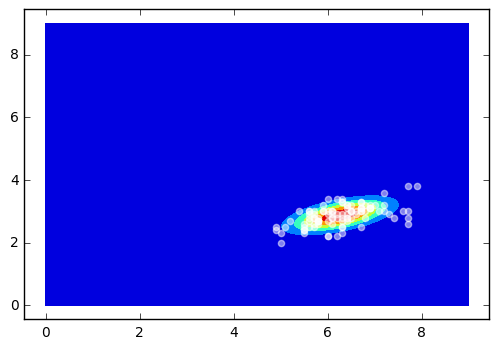

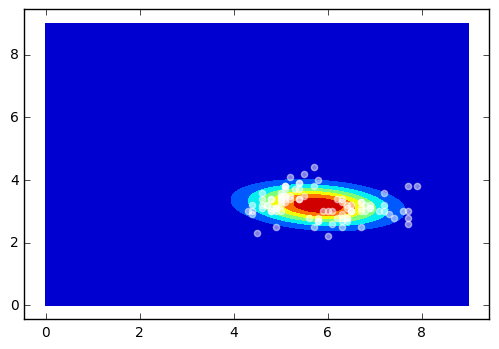

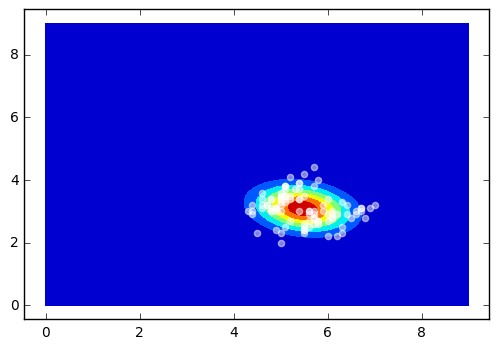

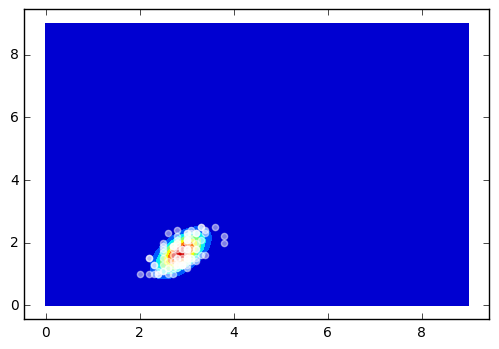

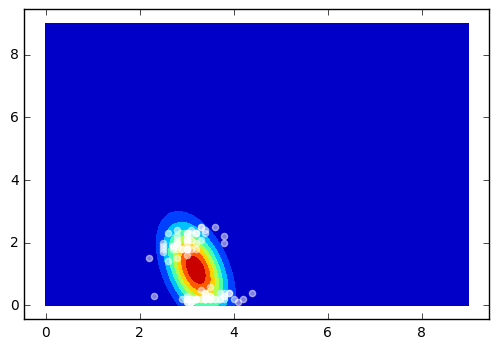

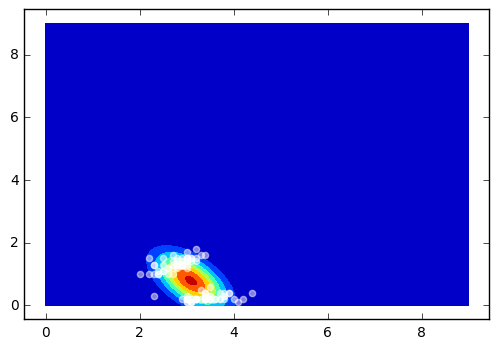

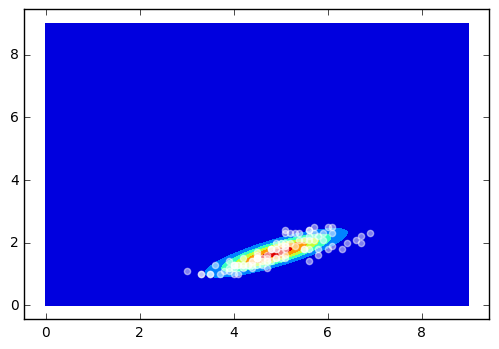

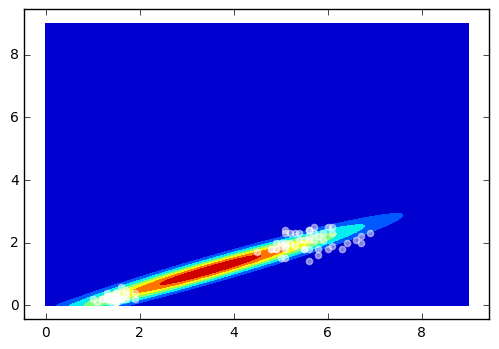

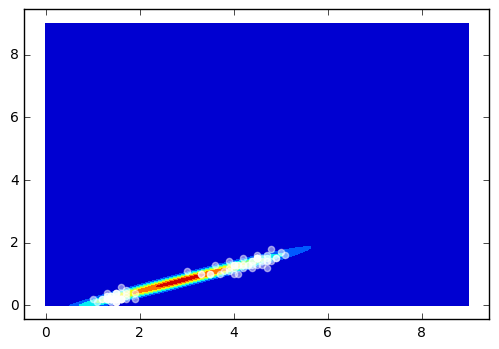

In [37]:
# Графики соответствующих плотностей и точки выборки
for t in range(3):
    for k in range(3):
        x, y = np.mgrid[0:9:.01, 0:9:.01]
        pos = np.empty(x.shape + (2,))
        pos[:, :, 0] = x; pos[:, :, 1] = y
        rv = multivariate_normal(a_pairs[t][k], cov_matrix_pairs[t][k])
        plt.contourf(x, y, rv.pdf(pos))
        plt.scatter(data[data.target != k].ix[:, pairs[t][0]], data[data.target != k].ix[:, pairs[t][1]], color = "white"\
                   , alpha=0.5)
        plt.show()

In [67]:
# Классификация точек
classes = []
for i in data.index:
    max_distr = 0
    win_k = 0
    for k in range(3):
        tmp = multivariate_normal.pdf(data.ix[i, :-1], a[k], cov_matrix[k])
        if tmp > max_distr:
            max_distr = tmp
            win_k = k
    classes += [win_k]

In [68]:
# Посчитаем долю ошибок
from sklearn import metrics
print 1-metrics.accuracy_score(data.target,classes)

0.02


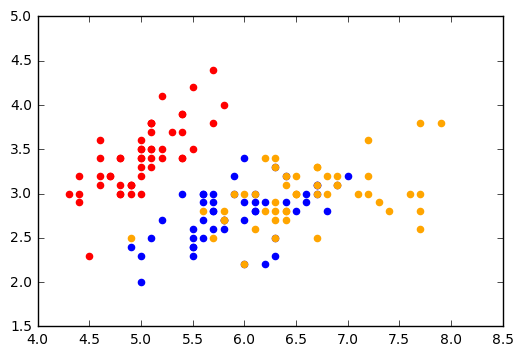

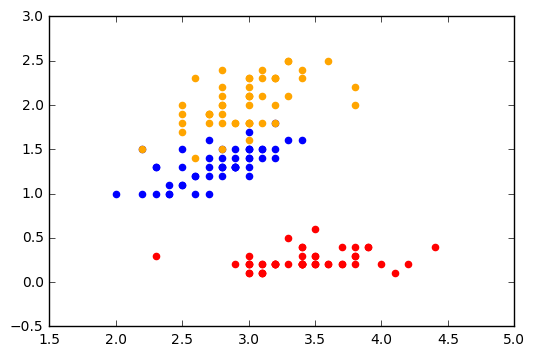

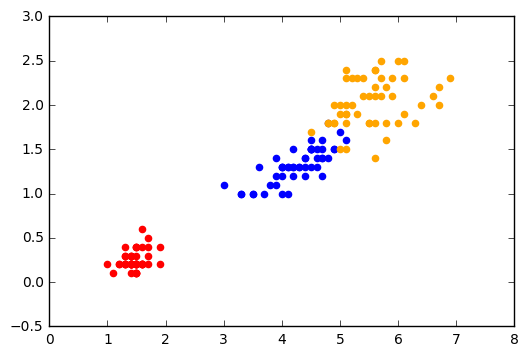

In [69]:
# Визуализация классов
colors = ['r','b','orange']
for i in range(3):
    first = pairs[i][0]
    second = pairs[i][1]
    for k in range(3):
        data[data.target == k]
        plt.scatter(data[data.target == k].ix[:, pairs[i][0]],data[data.target == k].ix[:, pairs[i][1]], color=colors[k])
    show()

### Вывод

Если считать ошибку по всем данным, то получится 2%. Но никакого вывода из этого сделать нельзя,
ведь классификатор видел данные, которые потом предсказывались. С таким же успехом можно было захардкодить элементы и получить ошибку в 0%. Нужно делать кросс-валидацию, но данных слишком мало. Кроме того, в данных был лик, и классы были упорядочены.